In [ ]:
import zipfile

zip_ref=zipfile.ZipFile('cars_image_dataset.zip','r')
zip_ref.extractall()
zip_ref.close()


In [ ]:
!ls cars_dataset

test  train


In [ ]:
import os

for dirpath,dirnames,filenames in os.walk('cars_dataset'):
  print(f"There are {len(dirnames)} and {len(filenames)} images in '{dirpath}'.")

There are 2 and 0 images in 'cars_dataset'.
There are 7 and 0 images in 'cars_dataset/test'.
There are 0 and 199 images in 'cars_dataset/test/Audi'.
There are 0 and 106 images in 'cars_dataset/test/Tata Safari'.
There are 0 and 75 images in 'cars_dataset/test/Mahindra Scorpio'.
There are 0 and 74 images in 'cars_dataset/test/Rolls Royce'.
There are 0 and 102 images in 'cars_dataset/test/Swift'.
There are 0 and 190 images in 'cars_dataset/test/Toyota Innova'.
There are 0 and 67 images in 'cars_dataset/test/Hyundai Creta'.
There are 7 and 0 images in 'cars_dataset/train'.
There are 0 and 814 images in 'cars_dataset/train/Audi'.
There are 0 and 441 images in 'cars_dataset/train/Tata Safari'.
There are 0 and 316 images in 'cars_dataset/train/Mahindra Scorpio'.
There are 0 and 311 images in 'cars_dataset/train/Rolls Royce'.
There are 0 and 424 images in 'cars_dataset/train/Swift'.
There are 0 and 775 images in 'cars_dataset/train/Toyota Innova'.
There are 0 and 271 images in 'cars_dataset/t

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder),1)


  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (194, 259, 3)


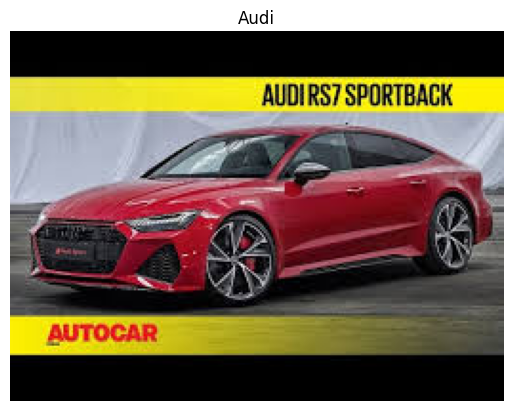

In [ ]:
img = view_random_image(target_dir="cars_dataset/train/",
                        target_class="Audi")

In [ ]:
img.shape

(194, 259, 3)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# train_datagen=ImageDataGenerator(rescale=1/255.)
# valid_datagen=ImageDataGenerator(rescale=1/255.)

train_dir="cars_dataset/train/"
test_dir="cars_dataset/test/"


In [ ]:
import tensorflow as td
IMG_SIZE=(224,224)
train_data=tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                               image_size=IMG_SIZE,
                                                               label_mode='categorical',
                                                               batch_size=32
                                                              )
test_data=tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                               image_size=IMG_SIZE,
                                                               label_mode='categorical'
                                                              )

Found 3352 files belonging to 7 classes.
Found 813 files belonging to 7 classes.


In [ ]:
train_data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 7), dtype=tf.float32, name=None))>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

data_augmentation = keras.Sequential([
  layers.RandomFlip("horizontal"),
  layers.RandomRotation(0.2),
  layers.RandomZoom(0.2),
  layers.RandomHeight(0.2),
  layers.RandomWidth(0.2),
  ], name ="data_augmentation")

Image shape: (168, 299, 3)


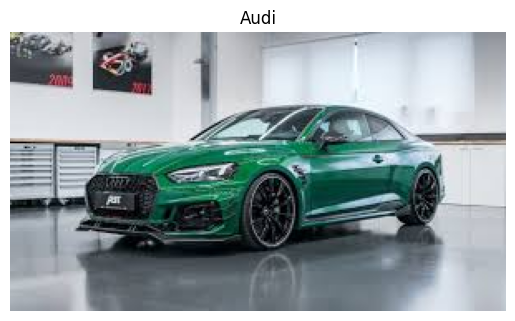

In [ ]:
img = view_random_image(target_dir="cars_dataset/train/",
                        target_class="Audi")

NameError: name 'target_class' is not defined

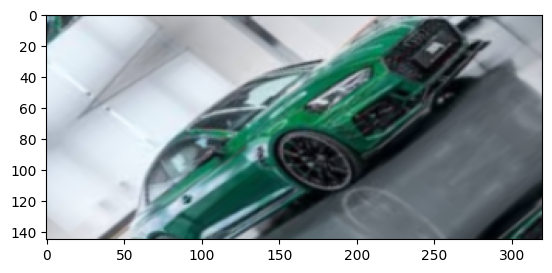

In [ ]:
augmented_img = data_augmentation(tf.expand_dims(img, axis=0))# data augmentation model requires shape (None, height, width, 3)
plt.figure()
plt.imshow(tf.squeeze(augmented_img)/255.) # requires normalization after augmentation
plt.title(f"Augmented random image from class: {target_class}")
plt.axis(False);

In [ ]:
input_shape = (224, 224, 3)
inputs = layers.Input(shape=input_shape, name="input_layer")
x = data_augmentation(inputs)
x=layers.Conv2D(filters=16,kernel_size=(3,3),strides=(1,1),activation='tanh')(x)
x=layers.MaxPool2D(pool_size=(2,2),padding='valid')(x)
x=layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu')(x)
x=layers.MaxPool2D(pool_size=(2,2))(x)
x=layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu')(x)
x=layers.MaxPool2D(pool_size=(2,2))(x)
x = layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
outputs = layers.Dense(7, activation="softmax", name="output_layer")(x)
model = tf.keras.Model(inputs, outputs)

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequent  (None, None, None, 3)     0         
 ial)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, None, None, 16)    448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, None, None, 16)    0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, None, None, 32)    4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, None, None, 32)    0   

In [ ]:
model.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

In [ ]:
history_1=model.fit(train_data,
                    epochs=15,
                    validation_data=test_data)

Epoch 1/15
105/105 [==============================] - 128s 1s/step - loss: 1.8167 - accuracy: 0.2882 - val_loss: 1.7776 - val_accuracy: 0.2903
Epoch 2/15
105/105 [==============================] - 102s 973ms/step - loss: 1.7742 - accuracy: 0.3129 - val_loss: 1.7626 - val_accuracy: 0.3038
Epoch 3/15
105/105 [==============================] - 100s 951ms/step - loss: 1.7656 - accuracy: 0.3144 - val_loss: 1.7435 - val_accuracy: 0.3432
Epoch 4/15
105/105 [==============================] - 100s 959ms/step - loss: 1.7463 - accuracy: 0.3291 - val_loss: 1.7470 - val_accuracy: 0.3149
Epoch 5/15
105/105 [==============================] - 84s 794ms/step - loss: 1.7389 - accuracy: 0.3383 - val_loss: 1.7324 - val_accuracy: 0.3419
Epoch 6/15
105/105 [==============================] - 85s 800ms/step - loss: 1.7279 - accuracy: 0.3395 - val_loss: 1.7389 - val_accuracy: 0.3235
Epoch 7/15
105/105 [==============================] - 82s 786ms/step - loss: 1.7287 - accuracy: 0.3303 - val_loss: 1.7328 - val_a

In [ ]:
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

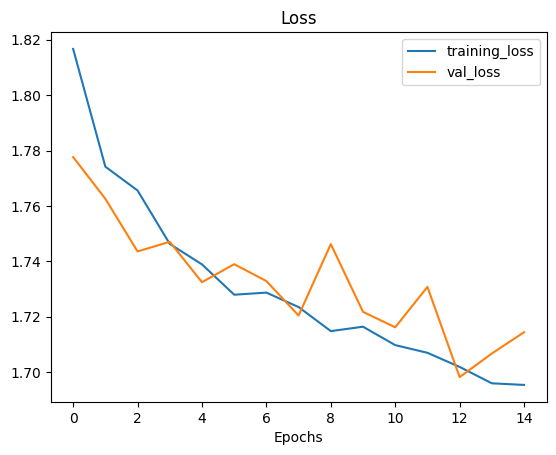

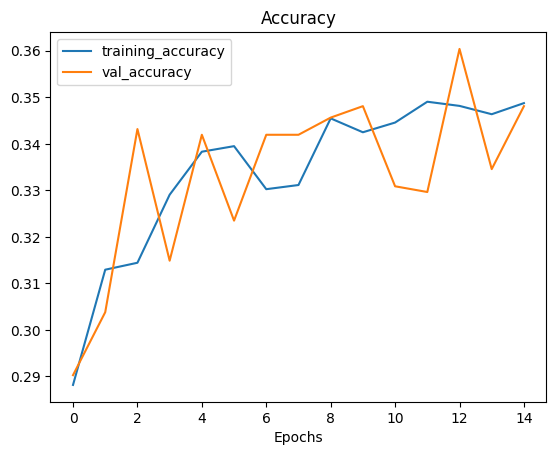

In [ ]:
plot_loss_curves(history_1)

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers

In [ ]:
import datetime
def create_tensorboard_callback(dir_name, experiment_name):
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(
      log_dir=log_dir
  )
  print(f"Saving TensorBoard log files to: {log_dir}")
  return tensorboard_callback

In [ ]:
resnet_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/4"

# Original: EfficientNetB0 feature vector (version 1)
efficientnet_url = "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1"

In [ ]:
IMAGE_SHAPE=(224,224)
def create_model(model_url, num_classes=7):
  feature_extractor_layer = hub.KerasLayer(model_url,
                                           trainable=False, # freeze the underlying patterns
                                           name='feature_extraction_layer',
                                           input_shape=IMAGE_SHAPE+(3,))

  # Create our own model
  model = tf.keras.Sequential([
    feature_extractor_layer,
    layers.Dense(num_classes, activation='softmax', name='output_layer') # create our own output layer
  ])

  return model

In [ ]:
resnet_model = create_model(resnet_url, num_classes=train_data.num_classes)


resnet_model.compile(loss='categorical_crossentropy',
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=['accuracy'])

In [ ]:
resnet_history = resnet_model.fit(train_data,
                                  epochs=5,
                                  steps_per_epoch=len(train_data),
                                  validation_data=test_data,
                                  validation_steps=len(test_data))
                                  # Add TensorBoard callback to model (callbacks parameter takes a list)
                                  # callbacks=[create_tensorboard_callback(dir_name="tensorflow_hub", # save experiment logs here
                                  #                                        experiment_name="resnet50V2")])

Epoch 1/5
105/105 [==============================] - 48s 81ms/step - loss: 1.4641 - accuracy: 0.4931 - val_loss: 1.0695 - val_accuracy: 0.6335
Epoch 2/5
105/105 [==============================] - 5s 50ms/step - loss: 0.8706 - accuracy: 0.7103 - val_loss: 0.9455 - val_accuracy: 0.6814
Epoch 3/5
105/105 [==============================] - 5s 51ms/step - loss: 0.6853 - accuracy: 0.7822 - val_loss: 0.8005 - val_accuracy: 0.7380
Epoch 4/5
105/105 [==============================] - 6s 53ms/step - loss: 0.5563 - accuracy: 0.8314 - val_loss: 0.7941 - val_accuracy: 0.7405
Epoch 5/5
105/105 [==============================] - 5s 47ms/step - loss: 0.4782 - accuracy: 0.8580 - val_loss: 0.7518 - val_accuracy: 0.7565


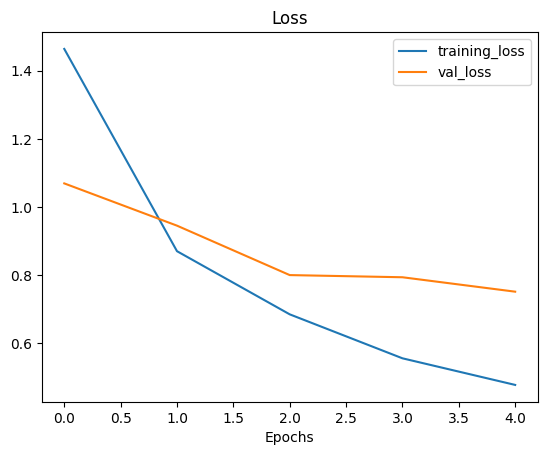

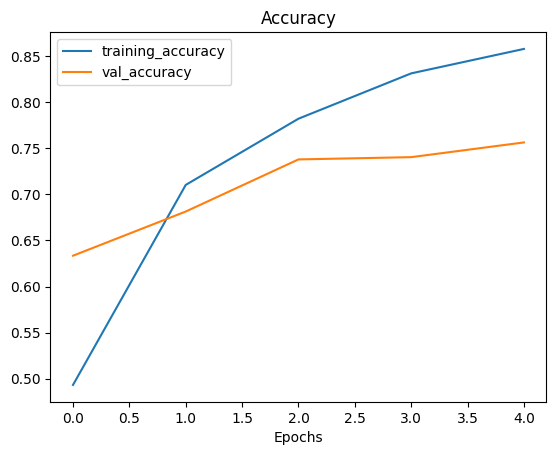

In [ ]:
plot_loss_curves(resnet_history)

In [ ]:
efficientnet_model = create_model(model_url=efficientnet_url,
                                  num_classes=train_data.num_classes)


efficientnet_model.compile(loss='categorical_crossentropy',
                           optimizer=tf.keras.optimizers.Adam(),
                           metrics=['accuracy'])


efficientnet_history = efficientnet_model.fit(train_data,
                                              epochs=10,
                                              steps_per_epoch=len(train_data),
                                              validation_data=test_data,
                                              validation_steps=len(test_data))

Epoch 1/10
105/105 [==============================] - 14s 59ms/step - loss: 1.2310 - accuracy: 0.5797 - val_loss: 0.8768 - val_accuracy: 0.7319
Epoch 2/10
105/105 [==============================] - 5s 44ms/step - loss: 0.7501 - accuracy: 0.7810 - val_loss: 0.6710 - val_accuracy: 0.8032
Epoch 3/10
105/105 [==============================] - 5s 49ms/step - loss: 0.5948 - accuracy: 0.8383 - val_loss: 0.5733 - val_accuracy: 0.8278
Epoch 4/10
105/105 [==============================] - 7s 68ms/step - loss: 0.5057 - accuracy: 0.8619 - val_loss: 0.5131 - val_accuracy: 0.8462
Epoch 5/10
105/105 [==============================] - 6s 53ms/step - loss: 0.4430 - accuracy: 0.8795 - val_loss: 0.4679 - val_accuracy: 0.8610
Epoch 6/10
105/105 [==============================] - 6s 54ms/step - loss: 0.3975 - accuracy: 0.8935 - val_loss: 0.4371 - val_accuracy: 0.8745
Epoch 7/10
105/105 [==============================] - 5s 47ms/step - loss: 0.3605 - accuracy: 0.9054 - val_loss: 0.4198 - val_accuracy: 0.878

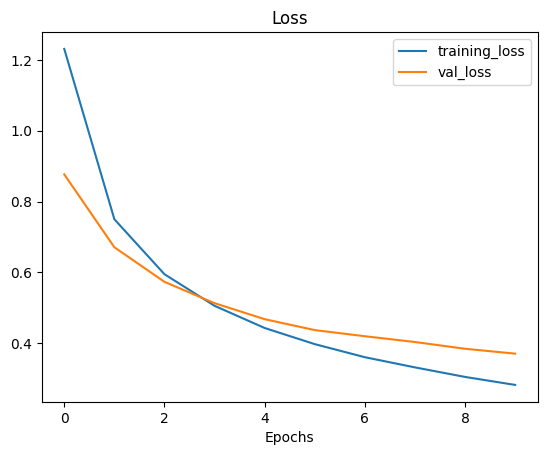

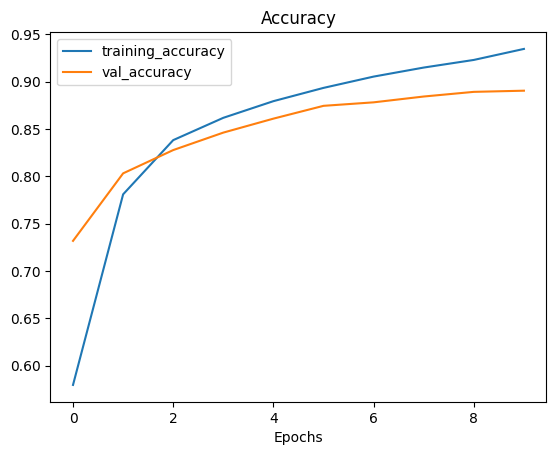

In [ ]:
plot_loss_curves(efficientnet_history)